# Merge main dataset w/ clean_description dataset

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/augmoura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/augmoura/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/augmoura/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/augmoura/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/augmoura/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
df = pd.read_csv("../datasets/winemag-data-130k-v2.csv")
df_clean_description = pd.read_csv("../datasets/clean_description.csv")

In [3]:
df_clean_description = df_clean_description.drop(columns="Unnamed: 0")


In [4]:
df.index = df_clean_description.index

df = pd.concat([df, df_clean_description], axis=1)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description_2
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aroma include tropical fruit broom brimstone d...
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity smooth still structure firm tannin...
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavor lime flesh rind dominate gr...
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottle come across rather ro...


## If needed, this is how to clean the descriptions

In [2]:
def clean_text(text):
    '''
    Preprocesses text
    '''
    text = text.strip()
    
    text = text.lower()
    
    for punct in string.punctuation:
        text = text.replace(punct, "")
    
    text = "".join(char for char in text if not char.isdigit())
    
    english_sw = stopwords.words("english")
    english_sw.append('wine')
    tokenized = word_tokenize(text)
    
    text = " ".join(word for word in tokenized if word not in english_sw)
    
    lemmatizer = WordNetLemmatizer()
    tokenized = word_tokenize(text)
    lemma_verb = [lemmatizer.lemmatize(word, pos="v") for word in tokenized]
    lemma_noun = [lemmatizer.lemmatize(word, pos="n") for word in lemma_verb]
    
    text = " ".join(word for word in lemma_noun)
    
    return text

In [6]:
df["clean_description"] = df["clean_description"].apply(clean_text)
df["clean_description"].head(10)

KeyError: 'clean_description'

# Vectorizing Words

In [ ]:
cleaned_doc = df["clean_description_2"]

In [7]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 0.05)

vectorized_doc = vectorizer.fit_transform(cleaned_doc)
vectorized_doc = pd.DataFrame(
    vectorized_doc.toarray(),
    columns=vectorizer.get_feature_names_out()
)

vectorized_doc

NameError: name 'cleaned_doc' is not defined

In [13]:
vectorized_doc.columns

Index(['acidity', 'age', 'apple', 'aroma', 'balance', 'berry', 'black',
       'blackberry', 'blend', 'bottle', 'bright', 'cabernet', 'character',
       'cherry', 'chocolate', 'citrus', 'come', 'crisp', 'currant', 'dark',
       'drink', 'dry', 'feel', 'finish', 'firm', 'flavor', 'fresh', 'fruit',
       'fruity', 'full', 'give', 'good', 'green', 'herb', 'hint', 'juicy',
       'lead', 'lemon', 'light', 'make', 'nose', 'note', 'oak', 'offer',
       'open', 'palate', 'peach', 'pear', 'pepper', 'pinot', 'plum',
       'raspberry', 'red', 'rich', 'ripe', 'round', 'sauvignon', 'show',
       'smooth', 'soft', 'spice', 'spicy', 'structure', 'sweet', 'tannin',
       'taste', 'texture', 'toast', 'touch', 'vanilla', 'vineyard', 'well',
       'white', 'year'],
      dtype='object')

# Unsupervised Learning (LDA)

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=5, max_iter=100)

lda_model.fit(vectorized_doc)

LatentDirichletAllocation(max_iter=100, n_components=5)

In [16]:
topic_mixture = lda_model.transform(vectorized_doc)

In [17]:
type(topic_mixture)

numpy.ndarray

In [18]:
topics = pd.DataFrame(
    topic_mixture,
    columns=["topic_0", "topic_1", "topic_2", "topic_3", "topic_4"]
)

topics.head()

,topic_0,topic_1,topic_2,topic_3,topic_4
0,0.052714,0.052838,0.052996,0.054169,0.787283
1,0.809534,0.047297,0.047719,0.048135,0.047315
2,0.068387,0.068585,0.067862,0.068006,0.727160
3,0.061376,0.060103,0.060024,0.060696,0.757801
4,0.074454,0.702969,0.074211,0.074310,0.074056


In [19]:
def print_topics(lda_model, vectorizer, top_words):
    # 1. TOPIC MIXTURE OF WORDS FOR EACH TOPIC
    topic_mixture = pd.DataFrame(
        lda_model.components_,
        columns = vectorizer.get_feature_names_out()
    )
    
    # 2. FINDING THE TOP WORDS FOR EACH TOPIC
    ## Number of topics
    n_components = topic_mixture.shape[0]

    ## Top words for each topic
    for topic in range(n_components):
        print("-"*10)
        print(f"For topic {topic}, here are the top {top_words} words with weights:")

        topic_df = topic_mixture.iloc[topic]\
            .sort_values(ascending = False).head(top_words)
        
        print(round(topic_df,3))

print_topics(lda_model, vectorizer, 5)

----------
For topic 0, here are the top 5 words with weights:
fruit        4283.229
drink        3751.681
age          3450.497
acidity      3404.744
character    3303.982
Name: 0, dtype: float64
----------
For topic 1, here are the top 5 words with weights:
pinot     2981.782
taste     2878.831
flavor    2647.623
oak       2381.431
sweet     2176.576
Name: 1, dtype: float64
----------
For topic 2, here are the top 5 words with weights:
cabernet      3663.265
blackberry    3363.169
chocolate     2362.493
sauvignon     2328.141
black         2221.928
Name: 2, dtype: float64
----------
For topic 3, here are the top 5 words with weights:
aroma     5081.694
palate    4720.343
berry     4344.976
cherry    4265.471
finish    3665.728
Name: 3, dtype: float64
----------
For topic 4, here are the top 5 words with weights:
apple     4962.484
white     4366.713
citrus    4306.469
peach     3714.531
lemon     3562.652
Name: 4, dtype: float64


# Encoding Topics

In [157]:
topic5 = topic_mixture[:5]
#np.max(topic5[0,:])


#for row in range(0,5):
#    for idx, num in enumerate(topic5[row,:]):
#        if idx != np.argmax(topic5[row,:]):
#            topic5[row,idx] == int(0)
#        else:
#            topic5[row,idx] == int(1)
            
topics_encoded = topic5.copy()
#np.argmax(topic5[2,:])

array([[0.05277152, 0.05410303, 0.05300948, 0.7874489 , 0.05266706],
       [0.04596958, 0.0467972 , 0.04659229, 0.04604805, 0.81459287],
       [0.06463684, 0.06381531, 0.06403556, 0.74273137, 0.06478092],
       [0.06002681, 0.06023638, 0.06044388, 0.75794186, 0.06135107],
       [0.72222226, 0.06904208, 0.06963905, 0.06920532, 0.0698913 ]])

In [158]:
for row in range(0,5):
    np.where(topic5 == np.max(topic5[row,:]), 1, 0)
    topics_encoded = topic5
    
topics_encoded

array([[0.05277152, 0.05410303, 0.05300948, 0.7874489 , 0.05266706],
       [0.04596958, 0.0467972 , 0.04659229, 0.04604805, 0.81459287],
       [0.06463684, 0.06381531, 0.06403556, 0.74273137, 0.06478092],
       [0.06002681, 0.06023638, 0.06044388, 0.75794186, 0.06135107],
       [0.72222226, 0.06904208, 0.06963905, 0.06920532, 0.0698913 ]])

In [159]:
max_ind = np.argmax(topics_encoded, axis=1)
row_ind = np.arange(topics_encoded.shape[0])
multi_ind = np.array([row_ind, max_ind])
linear_ind = np.ravel_multi_index(multi_ind, topics_encoded.shape)
topics_encoded.reshape((-1))[linear_ind] = 1

In [160]:
topics_encoded

array([[0.05277152, 0.05410303, 0.05300948, 1.        , 0.05266706],
       [0.04596958, 0.0467972 , 0.04659229, 0.04604805, 1.        ],
       [0.06463684, 0.06381531, 0.06403556, 1.        , 0.06478092],
       [0.06002681, 0.06023638, 0.06044388, 1.        , 0.06135107],
       [1.        , 0.06904208, 0.06963905, 0.06920532, 0.0698913 ]])

In [163]:
max_ind = np.argmax(topics_encoded, axis=1)
row_ind = np.arange(topics_encoded.shape[0])
multi_ind = np.array([row_ind, max_ind])
linear_ind = np.ravel_multi_index(multi_ind, topics_encoded.shape)
topics_encoded.reshape((-1))[linear_ind] = 1

SyntaxError: invalid syntax (3270361030.py, line 2)

# Concatenating df with topics

In [20]:
df.index = topics.index

df = pd.concat([df, topics], axis=1)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description,topic_0,topic_1,topic_2,topic_3,topic_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aroma include tropical fruit broom brimstone d...,0.052714,0.052838,0.052996,0.054169,0.787283
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity smooth still structure firm tannin...,0.809534,0.047297,0.047719,0.048135,0.047315
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavor lime flesh rind dominate gr...,0.068387,0.068585,0.067862,0.068006,0.727160
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...,0.061376,0.060103,0.060024,0.060696,0.757801
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottle come across rather ro...,0.074454,0.702969,0.074211,0.074310,0.074056


# Imputing Values to Price

In [20]:
from sklearn.impute import KNNImputer

X = df[["points", "price"]]

imputer = KNNImputer(n_neighbors=2)
df_copy[["points", "price"]] = imputer.fit_transform(X)

NameError: name 'df_copy' is not defined

In [27]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description,topic_0,topic_1,topic_2,topic_3,topic_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,14.5,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aroma include tropical fruit broom brimstone d...,0.052714,0.052838,0.052996,0.054169,0.787283
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity smooth still structure firm tannin...,0.809534,0.047297,0.047719,0.048135,0.047315
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavor lime flesh rind dominate gr...,0.068387,0.068585,0.067862,0.068006,0.727160
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,pineapple rind lemon pith orange blossom start...,0.061376,0.060103,0.060024,0.060696,0.757801
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like regular bottle come across rather ro...,0.074454,0.702969,0.074211,0.074310,0.074056


# Exploring Columns

## Price

<AxesSubplot:>

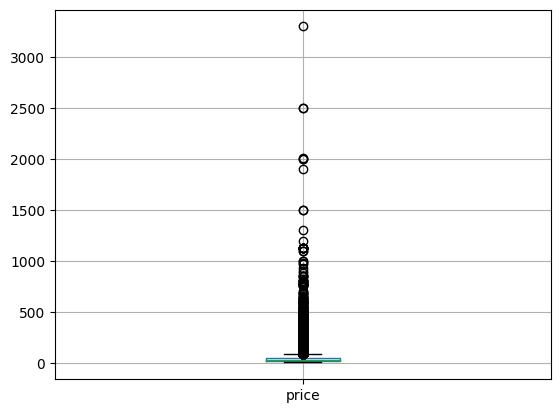

In [31]:
import matplotlib.pyplot as plt

df_copy[["price"]].boxplot()

In [33]:
df_copy[df_copy["price"] > 1400]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description,topic_0,topic_1,topic_2,topic_3,topic_4
1558,1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98.0,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux,massive margaux pack tannin ripe fruit caberne...,0.447083,0.047192,0.411419,0.047197,0.047109
15840,15840,France,The wine is a velvet glove in an iron fist. Th...,NaN,96.0,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus,velvet glove iron fist smooth surface ripe fru...,0.801101,0.049029,0.051985,0.049155,0.048731
65352,65352,France,This extravagantly perfumed wine has great jui...,NaN,97.0,2000.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus,extravagantly perfume great juicy ripe fruit t...,0.801996,0.049486,0.049428,0.049433,0.049657
80290,80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88.0,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,ripe show plenty blackberry fruit balance well...,0.823782,0.043582,0.044949,0.043828,0.043859
98380,98380,France,"A superb wine from a great year, this is power...",NaN,96.0,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,superb great year powerful structure great aci...,0.709939,0.153276,0.045904,0.045632,0.045249
111753,111753,France,"Almost black in color, this stunning wine is g...",NaN,100.0,1500.0,Bordeaux,Pauillac,NaN,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild,almost black color stun gorgeous rich dense gr...,0.066680,0.065484,0.736817,0.065940,0.065078
111755,111755,France,This is the finest Cheval Blanc for many years...,NaN,100.0,1500.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc,finest cheval blanc many year quite simply mag...,0.568082,0.049523,0.283836,0.049302,0.049257
113564,113564,France,"A wonderfully complete wine, with all the elem...",NaN,96.0,2000.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,wonderfully complete element place ripe powerf...,0.813484,0.046653,0.047220,0.046575,0.046067
120391,120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91.0,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair,nose singlevineyard strong often overlook appe...,0.056308,0.056557,0.056495,0.056991,0.773648


## Variety

In [38]:
len(df_copy["variety"].unique())

708

In [39]:
df_copy["variety"].unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Chardonnay', 'Malbec',
       'Tempranillo Blend', 'Meritage', 'Red Blend', 'Merlot',
       "Nero d'Avola", 'Chenin Blanc', 'Gamay', 'Sauvignon Blanc',
       'Viognier-Chardonnay', 'Primitivo', 'Catarratto', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend', 'Grillo',
       'Sangiovese', 'Cabernet Franc', 'Champagne Blend',
       'Bordeaux-style Red Blend', 'Aglianico', 'Petite Sirah',
       'Touriga Nacional', 'Carmenère', 'Albariño', 'Petit Manseng',
       'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato', 'Grüner Veltliner',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Pinot Blanc', 'Alsace white blend',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvign

# Predicting with NearestNeighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_validate

In [ ]:
cleaned_doc = df["clean_description_2"]

vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 0.01)

vectorized_doc = vectorizer.fit_transform(cleaned_doc)
vectorized_doc = pd.DataFrame(
    vectorized_doc.toarray(),
    columns=vectorizer.get_feature_names_out()
)

vectorized_doc

In [ ]:
vectorizer_matrix = vectorizer.fit_transform(cleaned_doc)
vectorizer_matrix.shape

In [ ]:
vectorizer.get_feature_names_out()

In [ ]:
X = vectorizer_matrix
n_neigh = NearestNeighbors(n_neighbors=5)
n_neigh.fit(X)

answer = str(input("Describe in a few words the type of wine you're looking for: "))

In [ ]:
english_sw = stopwords.words("english") + ["wine", "wines", "drink", "flavor", "age", "give", "vineyard", "vineyards", "year", "years"]

answer = clean_text(answer) #Check this function above in this notebook

answer_split = answer.split()
answer_transformed = vectorizer.transform(answer_split)
n_neigh.kneighbors(answer_transformed, 5, return_distance=False) #Currently this is resulting in the closest neighbors to each word in answer_transformed

# Predicting similarity with Doc2Vec

In [3]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
#from tqdm import tqdm

In [10]:
def tokenize_text(text):
    '''
    Tokenizes text in the main dataframe
    '''
    # Tokenize 
    tokenized = word_tokenize(text)
    
    return tokenized

In [11]:
tokenized_text = df["clean_description_2"].apply(lambda x: word_tokenize(str(x)))
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_text)] # Testing w/ first 100 rows from df

KeyboardInterrupt: 

In [24]:
answer_doc2vec = str(input("Describe in a few words the type of wine you're looking for: "))

Describe in a few words the type of wine you're looking for: i like white and dry wines


In [25]:
clean_answer = clean_text(answer_doc2vec)

In [26]:
%%time
test_doc = word_tokenize(clean_answer)
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)
test_doc_vector = model.infer_vector(test_doc)

model.dv.most_similar(positive = [test_doc_vector])

[(127504, 0.8388680815696716),
 (6880, 0.8270225524902344),
 (20894, 0.825497567653656),
 (72594, 0.8246555924415588),
 (21875, 0.8192472457885742),
 (70316, 0.8182402849197388),
 (114873, 0.8164960741996765),
 (96019, 0.8014243245124817),
 (114586, 0.7993941307067871),
 (55909, 0.7951002717018127)]

In [28]:
pickle.dump(model, open('model_v1.pkl','wb'))

# Using the imported model

In [90]:
model_imported = pickle.load(open('model_v1.pkl','rb'))

In [138]:
model_imported

In [91]:
answer_doc2vec_v1 = str(input("Describe in a few words the type of wine you're looking for: "))

Describe in a few words the type of wine you're looking for: tempranillo with apricot flavor


In [94]:
clean_answer = word_tokenize(clean_text(answer_doc2vec_v1))
test_doc_vector_v1 = model_imported.infer_vector(clean_answer)

In [105]:
clean_answer

['like', 'fullbodied', 'red', 'blackberry', 'flavour', 'tempranillo', 'grape']

In [107]:
test_doc_vector_v1

array([-1.8759357 ,  0.12467436,  0.9487271 , -0.28245983,  2.255683  ,
        1.9959582 ,  1.390618  ,  0.87371   , -0.21089435,  0.46532086,
       -0.48152164, -0.58406085,  2.4705503 ,  1.0751702 , -0.46933797,
        0.9899128 , -0.9153807 ,  1.2097777 , -0.29973528, -1.1147045 ],
      dtype=float32)

In [151]:
idx = []

for i, row in enumerate(model_imported.dv.most_similar(positive = [test_doc_vector_v1], topn=10000)):
    idx.append(row[0])

len(idx)

10000

In [152]:
df.iloc[idx]

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,...,fruity_flavor,earthy_flavor,mineral_flavor,oaky_flavor,sweet_flavor,coffee_flavor,spicy_flavor,floral_flavor,meaty_flavor,herbal_flavor
25517,25517,25528,Italy,"This offers aromas of dill, wet leaves, hay, pickled beets, roasted coffee bean and spearmint. The palate lacks fruit richness, delivering instead espresso and vanilla-sweetened oak. Astringent tannins generate a tongue-drying finish.",Le Coste di Monforte,86.0,80.0,Piedmont,Barolo,Kerin O’Keefe,...,[' fruit '],[' beet '],0,0,0,"[' coffee ', ' espresso ']",0,0,0,"[' dill ', ' hay ', 'pickle', 'spearmint']"
91674,91674,91718,Austria,"Hints of passion fruit sneak up on the nose of this fragrant wine, lifting up the smoky, mineral palate. Wonderfully tangy and fresh.",unknown,89.0,27.0,Südsteiermark,unknown,Anne Krebiehl MW,...,[' passion '],0,[' mineral '],[' smoky '],0,0,[' tangy '],0,0,0
4423,4423,4426,US,"Browned butter, toasted almonds, sea salt and peach blossoms converge for a compelling nose on this twist-top appellation blend. It's a full Chardonnay on the sip, with Meyer lemon peel, Gala apple and savory sea salt, all cut by a racy line of acidity.",unknown,89.0,25.0,California,Monterey County,Matt Kettmann,...,"[' peach ', ' lemon ', ' gala ']",0,"[' sea ', ' savory ']","[' butter ', ' almond ']",0,0,0,[' blossom '],"[' salt ', ' salt ']",0
51451,51451,51479,Australia,"This is a smooth-textured, medium- to full-bodied wine loaded with scents of cedar and spice. Red berry fruit emerges on the palate and lingers alongside the cedar notes on the long finish. Drink now–2020.",The Duke,91.0,49.0,South Australia,Clare Valley,Joe Czerwinski,...,[' berry '],0,0,"[' cedar ', ' cedar ']",0,0,[' spice '],0,0,0
94423,94423,94467,Austria,"This wine's tight nose gives little away. Its light-bodied, dry and slightly spritzy palate delivers fresh lemon fruit, which lingers into the zesty finish. This easy, fresh and ready for immediate drinking.",Falkenstein,87.0,16.0,Weinviertel,unknown,Anne Krebiehl MW,...,[' lemon '],0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127765,127765,127824,Spain,"Lemon, apple and a hint of honey characterize the bouquet, which is appealing as a whole. The palate is smooth, with a good mix of body and acidity. Flavors of pithy citrus, apple and green banana lead to a slightly bitter finish with almondy notes and lasting minerality.",unknown,89.0,19.0,Northern Spain,Valdeorras,Michael Schachner,...,"[' apple ', ' pithy ', ' apple ', ' banana ']",0,0,0,[' honey '],0,0,0,0,0
43413,43413,43431,France,"With attractive wood flavors, this is a wine with spice, toast and citrus flavors. Orange and yellow fruits come through the lime acidity and zesty texture. Drink from 2017.",Clos Rochette,89.0,35.0,Burgundy,Mercurey,Roger Voss,...,"[' orange ', ' fruit ', ' lime ']",0,0,[' wood '],0,0,[' spice '],0,0,0
30154,30154,30169,US,"Of the winery's two reserves, this is the darker in terms of both fruit and barrel flavors. Well-ripened cherry fruit fills the mouth, and leads into a full-bodied, resonant finish with highlights of toasted coconut. This delicious, well-balanced wine spent 10 months in new French oak.",Équinoxe Reserve,92.0,80.0,Oregon,Chehalem Mountains,Paul Gregutt,...,"[' fruit ', ' cherry ']",0,0,[' coconut '],0,0,0,0,0,0
70637,70637,70671,US,"Fragrant in floral jasmine and tropical aromas, this light, lean Sauvignon Blanc stays fresh in the glass.",Five Clones,86.0,19.0,California,Napa Valley,Virginie Boone,...,[' tropical '],0,0,0,0,0,0,[' floral '],0,0


# POS Tagging

In [67]:
common_words = pd.read_csv("common_words_df.csv")
common_words.head()

,Unnamed: 0,Terms,Freq
0,0,flavor,63355
1,1,fruit,58786
2,2,aroma,41019
3,3,finish,40453
4,4,palate,38292


In [68]:
common_words["POS"] = nltk.pos_tag(commom_words["Terms"])

In [69]:
common_words["POS"].head()

0    (flavor, NN)
1     (fruit, NN)
2     (aroma, NN)
3    (finish, JJ)
4    (palate, NN)
Name: POS, dtype: object

In [81]:
common_words["POS"].str[1][:]

0         NN
1         NN
2         NN
3         JJ
4         NN
        ... 
35287    VBP
35288     JJ
35289     NN
35290    VBD
35291    VBD
Name: POS, Length: 35292, dtype: object

In [82]:
common_words["POS"] = common_words["POS"].str[1][:]

In [85]:
common_words = common_words.drop(columns="Unnamed: 0")

In [87]:
common_words.to_csv("../working_files/common_words.csv")

## Filtering relevant POS tags

In [6]:
cw = pd.read_csv("../working_files/common_words.csv")

In [7]:
cw.head()

,Unnamed: 0,Terms,Freq,POS
0,0,flavor,63355,NN
1,1,fruit,58786,NN
2,2,aroma,41019,NN
3,3,finish,40453,JJ
4,4,palate,38292,NN


In [8]:
tags = ["VBD", "JJ", "IN", "JJS"] # No: CC, CD, DT, EX, FW,

cw[cw["POS"]=="JJR"][5:50] # .isin(tags)

,Unnamed: 0,Terms,Freq,POS
1516,1516,higher,219,JJR
1655,1655,older,190,JJR
1704,1704,temper,181,JJR
1730,1730,wildflower,177,JJR
1831,1831,greater,162,JJR
1850,1850,oyster,158,JJR
1884,1884,earthier,153,JJR
1986,1986,lower,140,JJR
2007,2007,meunier,136,JJR
2077,2077,bigger,127,JJR


In [9]:
df.iloc[128920]

Unnamed: 0                                                          128920
country                                                             France
description              This supple yet mouthfilling wine boasts inten...
designation                                                            NaN
points                                                                  89
price                                                                 35.0
province                                                      Rhône Valley
region_1                                               Châteauneuf-du-Pape
region_2                                                               NaN
taster_name                                                 Joe Czerwinski
taster_twitter_handle                                               @JoeCz
title                    Les Trois Couronnes 2011 Red (Châteauneuf-du-P...
variety                                              Rhône-style Red Blend
winery                   

In [15]:
pd.options.display.max_colwidth = 450

df[["description"]][df["description"].str.contains("summer")][0:49]

,description
83,"Pale copper in hue, this wine exudes passion fruit on the nose, while the palate delivers nuances of muskmelon as well. It's crisp, racy and medium in body, perfectly suited to summertime refreshment. Drink now."
135,"The color is just beginning to show signs of browning at the edge, but the wine is still fresh and vibrant. The nose is complex, showing licorice, summer fruits, caramel and roses. On the palate, it is soft and pleasant, but lacks some concentration. At its peak, but will drink well for a few years."
136,"This wine's black cherry and plum flavors veer dangerously toward prune—no doubt a product of the exceedingly hot summer. It's creamy and supple in texture, adding just enough tobacco, vanilla and smoke for complexity. But for all the fruit and ripeness, it finishes with great elegance and precision. Drink now–2020. Imported by Acadia Imports."
331,"Frosted aromas of orange creamsicle, lychee and melon give this an elevated, unique sort of bouquet. Among Chilean Gewürztraminers, this is one of the more expressive ones you'll find. Pineapple, mango and other tropical flavors are pleasant, while the feel is forward and fun. Drink this summer with fish and salads."
416,This is an easy-going Prosecco with lively tones of stone fruit and citrus. The wine is informal and tonic which makes it perfect as an appetizer wine or with friends on a lazy summer afternoon.
425,"Blossom and berry notes are accented by hints of smoked nut in this refreshingly light-bodied wine. Zesty and lithe on the palate, it's an ideal summer-to-fall apéritif or porch sipper. The moderately long finish is marked with a hint of waxy florals."
589,"A dark, smoky smudge seems to cover the red-cherry notes on the nose. The palate is juicy and light, with this red-cherry nature at its core. Easy and light, it's a perfect fruit-driven summer red."
591,"Almost luscious pear aromas and notes of peardrop make for a very fruity nose. The palate has a fruity, lemony ease, while the body is slender, dry and has some spritz. The lemon freshness is vivid, brightening everything on this easy, fruity summer wine."
866,"This is ripe, rich and even a touch tannic—almost more of a light red than a true rosé. This makes it ideally suited to serve alongside summer's various grilled meats. Raspberry and cola flavors finish spicy and round."
872,"Not such a rarity these days, Albariño is turning heads in California and Oregon. This tart, juicy, and deliciously fresh effort is loaded with tangy citrus and green apple fruit. It's leesy and textural, tasting of wet stones: in sum, a wonderfully refreshing summer white."


In [199]:
# Flavor Categories
fruity = " fruitforward | fruit | zippy | nervy | fruitdriven | compote |mulberry| saucy |blackplum|redcurrant|redcherry| peachy | jelly |whitefruit|darkfruit|cantaloupe|mandarin| cider |bartlett| pit |melony|persimmon|cocktail| sappy | granny |greenapple|cherryberry| redplum |zestiness| rum | grapey | zing | blood orange | nectar | foxy |aciddriven| bosc |tropicalfruit|olallieberry|bergamot|darkberry|passionfruit|fruitier|kumquat|bluefruit|plumskin|huckleberry| gala |lemonade|tapenade|sourcherry|greenfruit|redapple|gravenstein|fullfruited|greenplum|berrycherry|sourness|yellowfruit|tropicality|orangepeel|whitepeach|clementine|appley|pruney| pecan |pinkgrapefruit|apple skin|orangepink|pomelo|grapefruity|purplefruit|citrusflavored|balmlike|crisptart|greenmelon|lemonpith|strawberrycherry|limedriven|fruitbased|citrusfocused|limepeel|lemonlike|applepeel|currantflavored|cranraspberry|strawberryraspberry|fuji|bakedberry|grapefruitlike|freshfruit|mixedberry|peachflavored|muskmelon|melonrind|pearskin|ollallieberry|cherryfruit|citrusladen|pearfruited|limeflavored|citrustinged|orangeflavored|yellowplum|peachiness|citrussy|apricotflavored|lemonrind|peachlike|citrusfresh|berrydriven|applecider|fruitpacked|cranberrycherry|fruitfulness|blackberryflavored|limetinged|applefresh|applefruited|yellowgrapefruit|cherryraspberry|fruitforwardness|limeinflected|cherryish|washedrind| mandarinorange | fruits | cherry | berry | plum | blackberry | apple | raspberry | peach | lemon | pear | currant | orange | lime | strawberry | cassis | apricot | melon | pineapple | cola | grapefruit | tropical | blueberry | cranberry | zest | tangerine | sour | prune | nectarine | raisin | blue | mango| pomegranate | citrusy | lemony | fig | boysenberry | viognier | zinfandel | blackfruit | rind | banana | redberry | lychee | zin | redfruit | passion | pithy | rhubarb | papaya | citric | blackcurrant | lemonlime | blackcherry | gooseberry | kiwi | raisiny | stonefruit | guava | briary | plummy | watermelon"
earthy = " elderberry | soy | ground | tree | rooty | funk | terroir | clay | grain | prickly | beet | pea | loam | fizz | mealy | brush | earthier |sunbaked| mossy | umami |saddle|mushroomy|porcini|mesquite| egg | dog | rust |shiitake| wheat |terroirdriven| wheaty | truffled | umamirich | barley | leather | olive | forest | soil | underbrush | mushroom | leathery | grass | stalky | cheese | leafy | grassy | brambly | nutty | truffle | root | bramble | till | river | orchard | cigar | vegetal | chard | bay | earthiness | earthy "
mineral = " iron | chalk | saline | leesy | cracker | soda | granite | tarry | gravel | sear | watery |hickory|cement| brine |mineraldriven|sanguine| shell |rocky|smokiness| ash | nail |bready| iodine |charcoal|brick|crus|ocean|dough|cotton|latex|limestone|copper|oxidation|saltiness|sourdough|salinity|brimstone| talcum | lava |chalkiness|sulfuric|gunmetal|sodalike| briney |stoney|watereddown|plasticlike|plaster|turpentine|charry|cementlike|minerallaced|ironrich|flintiness| mineraltinged | mineralrich | mineral | savory | stone | minerality | graphite | burn | steely | chalky | yeasty | minerally | dust | briny | rubber | slate | pine | yeast | steel | resiny | stony | stainless | sea | inky | resin | asphalt "
oaky = " maple | vanilla | shave |oakdriven| scour | bark |toastiness|cedary|oakbased|woodaging| cask | overoaked |feathery|welloaked|oakinspired| newwood | wooded |frenchoak|toastier|vanillainfused|vanillabean|barrelinfluenced|woodfermented|vanillakissed|woodbased|creambased|caramellaced|creamily| piecrust |vanillaladen|almondlike|superoaky|almondflavored|oaklike| treacle |charredoak | wood | tobacco | smoky | smoke | almond | toasty | cedar | butter | finegrained | coconut | woody | buttery | pencil | oaked "
sweet = " molasses | popcorn |marmalade| walnut | custard |toffee|botrytis| cloy | carob |beeswax|brioche|lipsmacking|marzipan|bittersweet| curd | fudge |sweetly|semisweet| corn | sweeter | graham |mediumsweet|marshmallow|honeycomb| lactic | wax | gum | cookie |malolactic|bubblegum|confectionary| sweeten |chocolatecovered|bing|anjou|meringue|cucumber|anisette|buttercream|peanut|porty|nuttiness|cooky|cashew|sweettasting|biscuit|chestnut|maraschino|yogurt|nougat|almostsweet|sweetandsour|sweetsmelling|chocolatey|sultana|sweetseeming|sesame| lait | doughy |candylike|grenadine|lollipop|cranberryfilled|prunelike|shortcake|candysweet|liqueurlike|tuttifrutti|fudgelike| torte |raisinated|dessertlike|pastryfilling|stemminess|popsicle|coulis|fruitpunch|limeade|cherrycandy| sundae | jello |skittle|driedcherry|honeydrizzled| scotch | nilla |honeyglazed|bitterchocolate|cocoadusted|tapioca|praline|sugariness|superripeness|sarsparilla|sweetsour|punchlike| taffy | chocolate | licorice | honey | candy | caramel | jam | sugar | cream | nut | brown | mellow | balsamic | cake | butterscotch | chocolaty | read | mousse | syrup | honeydew | hazelnut | sugary | syrupy | caramelize | liqueur "
coffee = " espressolike | kahlua | amaretto | roasty | espresso | mocha | coffee | cocoa | bean "
spicy = " pinch | dash | allspice | juniper |spiciness|woodspice|saffron|gingerbread|jalapeño|piquant| vinegar | curry |christmas|bakingspice|blackpepper| mustard | arugula | cumin | mace |aniseed|sarsaparilla|cinnamonspice|pepperiness|cayenne|clovespiked|spiceflavored|cinnamonspiced|spicecake|spicysweet|superspicy | spice | pepper | cinnamon | tangy | peppery | nutmeg | ginger | peppercorn | tang | cardamom "
floral = " acacia | wildflower | flowery | clove | clover |rosewater|wisteria|elderflower|gardenia| lily |geranium| rosehip |cherryblossom | flower | floral | violet | blossom | honeysuckle | petal | spring | lavender | jasmine "
meaty = " gamy | bonedry | jerky | teriyaki | poultry | beefy | charcuterie | meatiness | meat | meaty | beef | salty | chop | bacon | succulent | stew | backbone | steak | salt | barbecue | flesh | chicken | pork | lamb "
herbal = " lemongrass | beer |sagebrush|pickle|chamomile| stemmy |needle| weedy | nettle | celery | tarragon |spearmint|marjoram|herbaceousness| basil | camphor | tomatoey |sassafras|verbena|lettuce|medicine| veggie |wintergreen| scallion |peppermint| earl grey | greenleaning | fynbos | greenherb | briar |botanical|grassiness|jicama|leafiness|chive|tealike|artichoke|medicinality|mintiness|mustardy|bellpepper|greenpepper|ginlike|herbed|whitetea|herblaced|pyrazine|pepperinfused| zestier| oolong |  herb | herbal | anise | mint | tea | tomato | menthol | thyme | minty | herbaceous | eucalyptus | fennel | medicinal | oregano | hay | dill | oregon | rosemary "

In [177]:
#Color Category
red = " darkcolored | black | red | dark | purple | darker | sanguine | darkly | blood | blackness | cherryred | redblack | tannin | tannins | noir | malbec | velvety | pommard | garnet | tawny "
ruby = " ruby | rubycolored "
white = " white | blanc | riesling | champagne | prosecco | chablis "
gold = " gold | yellow | riesling | golden | amber | midgold | goldeneye | deepgold | oldgold | golden | gewürztraminer | gewurztraminer | sauterne | gew√ºrztraminers | amber "
rose = " ros√©️ | rosé | rose | pink | pinkorange | salmoncolored "

In [217]:
#Geographical Category
western_europe = "France|Italy|Spain|Portugal|Greece|Turkey|Cyprus|Austria|Germany|England|Switzerland|Luxembourg"
eastern_europe = "Bulgaria|Hungary|Romania|Georgia|Ukraine|Serbia|Czech Republic|Slovakia|Slovenia|Croatia|Moldova|Macedonia|Kosovo"
america = "US|Canada|Chile|Argentina|Uruguay|Mexico|Brazil|Peru"
oceania = "Australia|New Zealand"
rest_of_world = "South Africa|Israel|Lebanon|Morocco|India|Palestinian Territory, Occupied|Bosnia and Herzegovina|Armenia|China|Egypt"

In [181]:
import re
import numpy as np

In [255]:
key = df["clean_description_2"][0:49].apply(lambda x: re.findall(fruity, x))
#key = df["clean_description_2"][0:49].apply(lambda y: re.findall(oaky, y))
#df["clean_description_2"][0:49].apply(lambda x: re.findall(oaky, x))

key

0                     [ tropical ,  apple ]
1                                 [ berry ]
2             [ lime ,  rind ,  pineapple ]
3               [ rind ,  orange ,  guava ]
4                                        []
5                     [ raspberry ,  plum ]
6                                 [ berry ]
7                                        []
8                                 [ peach ]
9                        [ apple ,  fruit ]
10                                 [ plum ]
11                                       []
12                                [cherry ]
13                                 [ plum ]
14           [ apple ,  pear ,  pineapple ]
15                      [ orange ,  apple ]
16                [ plum ,  saucy ,  plum ]
17      [ blackcherry , darkberry,  fruit ]
18             [ blackberry ,  blackberry ]
19                       [ fruit , cherry ]
20                     [ berry ,  currant ]
21                                [ berry ]
22             [ passion ,  lime

In [256]:
#create multiple columns for flavors
fruity_flavor = pd.DataFrame(np.where(df["clean_description_2"][0:999].str.contains(fruity), 1, 0))
earthy_flavor = pd.DataFrame(np.where(df["clean_description_2"][0:999].str.contains(earthy), 1, 0))

fruity_flavor.head(49)

,0
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,1


In [257]:
earthy_flavor.value_counts()

0    827
1    172
dtype: int64

In [51]:
flavors[flavors[0]=="coffee_flavor"]

,0
159,coffee_flavor
190,coffee_flavor
252,coffee_flavor
348,coffee_flavor
404,coffee_flavor
549,coffee_flavor
618,coffee_flavor
683,coffee_flavor
721,coffee_flavor
765,coffee_flavor


In [169]:
df["title"][df["description"].str.contains("This small-production Tuscan-")]

10052    Orsi Family Vineyards 2013 Sangiovese (Dry Creek Valley)
Name: title, dtype: object

In [144]:
idx = [2, 0, 1]
df.iloc[idx]

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,...,fruity_flavor,earthy_flavor,mineral_flavor,oaky_flavor,sweet_flavor,coffee_flavor,spicy_flavor,floral_flavor,meaty_flavor,herbal_flavor
2,2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,...,"[' lime ', ' rind ', ' pineapple ']",0,0,0,0,0,0,0,[' flesh '],0
0,0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,...,"[' tropical ', ' apple ']",0,['brimstone'],0,0,0,0,0,0,0
1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,...,[' berry '],0,0,0,0,0,0,0,0,0


In [17]:
df[df["description"].str.contains("Truffle, new leather and plum are so")]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,clean_description_2
19538,19538,Italy,"Truffle, new leather and plum are some of the aromas you'll find in this taut red. The palate delivers Morello cherry, crushed raspberry, star anise and earthy game flavors, set against bright acidity and tightly wound tannins. Drink 2018–2023.",NaN,90,26.0,Tuscany,Vino Nobile di Montepulciano,NaN,Kerin O’Keefe,@kerinokeefe,La Ciarliana 2013 Vino Nobile di Montepulciano,Red Blend,La Ciarliana,truffle new leather plum aroma youll find taut red palate deliver morello cherry crush raspberry star anise earthy game flavor set bright acidity tightly wind tannin –


In [176]:
df[df["fruity_flavor"] != "0"].shape

(121673, 25)

# Adding flavor columns to clean dataset

In [197]:
clean_dataset = pd.read_csv("../datasets/clean_dataset.csv")
clean_dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,clean_description_2
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,aroma include tropical fruit broom brimstone dry herb palate isnt overly expressive offer unripened apple citrus dry sage alongside brisk acidity
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,ripe fruity smooth still structure firm tannin fill juicy red berry fruit freshen acidity already drinkable although certainly better
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,tart snappy flavor lime flesh rind dominate green pineapple poke crisp acidity underscore flavor stainlesssteel ferment
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,pineapple rind lemon pith orange blossom start aroma palate bite opulent note honeydrizzled guava mango give way slightly astringent semidry finish
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,much like regular bottle come across rather rough tannic rustic earthy herbal characteristic nonetheless think pleasantly unfussy country good companion hearty winter stew


In [98]:
clean_dataset["fruity_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(fruity), 1, 0)
clean_dataset["earthy_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(earthy), 1, 0)
clean_dataset["mineral_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(mineral), 1, 0)
clean_dataset["oaky_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(oaky), 1, 0)
clean_dataset["sweet_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(sweet), 1, 0)
clean_dataset["coffee_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(coffee), 1, 0)
clean_dataset["spicy_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(spicy), 1, 0)
clean_dataset["floral_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(floral), 1, 0)
clean_dataset["meaty_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(meaty), 1, 0)
clean_dataset["herbal_flavor"] = np.where(clean_dataset["clean_description_2"].str.contains(herbal), 1, 0)

In [99]:
clean_dataset.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,fruity_flavor,earthy_flavor,mineral_flavor,oaky_flavor,sweet_flavor,coffee_flavor,spicy_flavor,floral_flavor,meaty_flavor,herbal_flavor
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,1,0,1,0,0,0,0,0,0,0


In [103]:
clean_dataset["sweet_flavor"].value_counts()

0    119792
1     10179
Name: sweet_flavor, dtype: int64

In [200]:
clean_dataset["Fruity"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(fruity, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
clean_dataset["Earthy"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(earthy, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
clean_dataset["Mineral"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(mineral, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
clean_dataset["Oaky"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(oaky, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
clean_dataset["Sweet"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(sweet, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
clean_dataset["Coffee"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(coffee, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
clean_dataset["Spicy"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(spicy, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
clean_dataset["Floral"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(floral, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
clean_dataset["Meaty"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(meaty, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
clean_dataset["Herbal"] = clean_dataset["clean_description_2"].apply(lambda x: re.findall(herbal, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))

In [264]:
#test = clean_dataset[["fruity_flavor"]][0:5].applymap(lambda x: x if isinstance(x, list) and x else 0)

In [286]:
clean_dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,fruity_flavor,earthy_flavor,mineral_flavor,oaky_flavor,sweet_flavor,coffee_flavor,spicy_flavor,floral_flavor,meaty_flavor,herbal_flavor
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,"[ tropical , apple ]",0,[brimstone],0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,@vossroger,...,[ berry ],0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,"[ lime , rind , pineapple ]",0,0,0,0,0,0,0,[ flesh ],0
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,"[ rind , orange , guava ]",0,0,0,[honeydrizzled],0,0,[ blossom ],0,0
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,[ earthy ],0,0,0,0,0,0,0,[ herbal ]


In [287]:
clean_dataset["fruity_flavor"].value_counts()

[ fruit ]                                    11251
0                                             8298
[ cherry ]                                    6452
[ berry ]                                     3501
[ blackberry ]                                3489
                                             ...  
[ fruit ,  gooseberry ,  pear ,  apple ]         1
[ banana ,  pear ,  fruit ]                      1
[ zest ,  blackberry ]                           1
[ fruit ,  cola ,  cherry ,  blackberry ]        1
[ cassis ,  fruit ,  cassis ,  orange ]          1
Name: fruity_flavor, Length: 18851, dtype: int64

In [201]:
clean_dataset.to_csv("../datasets/clean_dataset_v2.csv")

# Using clean_dataset_v2

In [117]:
v2 = pd.read_csv("../datasets/clean_dataset_v2.csv")
v2.head()

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,...,fruity_flavor,earthy_flavor,mineral_flavor,oaky_flavor,sweet_flavor,coffee_flavor,spicy_flavor,floral_flavor,meaty_flavor,herbal_flavor
0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,...,"[' tropical ', ' apple ']",0,['brimstone'],0,0,0,0,0,0,0
1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,...,[' berry '],0,0,0,0,0,0,0,0,0
2,2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,...,"[' lime ', ' rind ', ' pineapple ']",0,0,0,0,0,0,0,[' flesh '],0
3,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,...,"[' rind ', ' orange ', ' guava ']",0,0,0,['honeydrizzled'],0,0,[' blossom '],0,0
4,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,...,0,[' earthy '],0,0,0,0,0,0,0,[' herbal ']


In [118]:
v2.shape

(129971, 25)

In [6]:
v2[v2["description"].str.contains("This is a pretty wine, forward and fruit-")]

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,...,fruity_flavor,earthy_flavor,mineral_flavor,oaky_flavor,sweet_flavor,coffee_flavor,spicy_flavor,floral_flavor,meaty_flavor,herbal_flavor
49387,49387,49411,US,"This is a pretty wine, forward and fruit-drive...",unknown,88.0,28.0,Oregon,Willamette Valley,Paul Gregutt,...,"[' fruitdriven ', ' cherry ']",0,0,0,0,0,0,0,0,0
66136,66136,66168,US,"This is a pretty wine, forward and fruit-drive...",unknown,88.0,28.0,Oregon,Willamette Valley,Paul Gregutt,...,"[' fruitdriven ', ' cherry ']",0,0,0,0,0,0,0,0,0


In [99]:
flavorSelect = ["fruity_flavor", "earthy_flavor", "mineral_flavor"] #, "earthy_flavor", "mineral_flavor"]

df_filtered = {}
for flavor in flavorSelect:
    df_filtered[flavor] = v2[v2[flavor] != 0]
    
for name, df in df_filtered.items():
    new_df = pd.DataFrame(df)

In [40]:
list(df_filtered.keys())

['fruity_flavor', 'earthy_flavor']

In [41]:
df_filtered.

{'fruity_flavor':         Unnamed: 0.1  Unnamed: 0                          country  \
 0                  0           0                            Italy   
 1                  1           1                         Portugal   
 2                  2           2                               US   
 3                  3           3                               US   
 4                  4           4                               US   
 ...              ...         ...                              ...   
 129966        129966      124176                      Switzerland   
 129967        129967      129407                          Uruguay   
 129968        129968      129408                          Uruguay   
 129969        129969      129590                           Turkey   
 129970        129970      129900  Palestinian Territory, Occupied   
 
                                               description  \
 0       Aromas include tropical fruit, broom, brimston...   
 1       This is 

In [59]:
#for flavor in flavorSelect:
d = pd.DataFrame()
for f in flavorSelect:
    new = v2.loc[(v2[flavorSelect[f]] != "0")] # | (v2[flavorSelect[1]] != "0")] #|(v2[flavorSelect[2]] != "0") if flavorSelect[2] == True else None]

new

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,...,fruity_flavor,earthy_flavor,mineral_flavor,oaky_flavor,sweet_flavor,coffee_flavor,spicy_flavor,floral_flavor,meaty_flavor,herbal_flavor
0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,...,"[' tropical ', ' apple ']",0,['brimstone'],0,0,0,0,0,0,0
1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,...,[' berry '],0,0,0,0,0,0,0,0,0
2,2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,...,"[' lime ', ' rind ', ' pineapple ']",0,0,0,0,0,0,0,[' flesh '],0
3,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,...,"[' rind ', ' orange ', ' guava ']",0,0,0,['honeydrizzled'],0,0,[' blossom '],0,0
4,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,...,0,[' earthy '],0,0,0,0,0,0,0,[' herbal ']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,124176,Switzerland,This Swiss red blend is composed of four varie...,Les Romaines,90.0,30.0,La Côte,unknown,Jeff Jenssen,...,"[' cherry ', ' raspberry ']",[' elderberry '],0,0,0,0,"[' pepper ', ' pepper ']",0,0,0
129967,129967,129407,Uruguay,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89.0,22.0,Central,unknown,Michael Schachner,...,"[' plum ', ' currant ']",[' earthy '],0,0,0,0,0,0,0,[' tomato ']
129968,129968,129408,Uruguay,El Capricho is one of Uruguay's more consisten...,Reserve,89.0,22.0,Central,unknown,Michael Schachner,...,"[' cola ', ' berry ', ' plum ']",0,0,"[' smoky ', ' toasty ']",0,0,0,0,0,0
129969,129969,129590,Turkey,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90.0,30.0,Marmara,unknown,Mike DeSimone,...,"[' cassis ', ' fruit ', ' cassis ', ' orange ']","[' elderberry ', ' elderberry ']",[' inky '],[' vanilla '],0,0,[' spice '],0,0,[' anise ']


In [50]:
type(v2["earthy_flavor"][0])

str

In [67]:
tmp = pd.DataFrame()
for i in flavorSelect:
    tmp &= v2[v2[i] != '0']

v2[tmp == false]

NameError: name 'false' is not defined

In [65]:
new_d = v2[(v2[flavorSelect[0]] != "0") | (v2[flavorSelect[1]] != "0")] #|(v2[flavorSelect[2]] != "0") if flavorSelect[2] == True else None]
new_d

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,...,fruity_flavor,earthy_flavor,mineral_flavor,oaky_flavor,sweet_flavor,coffee_flavor,spicy_flavor,floral_flavor,meaty_flavor,herbal_flavor
0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,...,"[' tropical ', ' apple ']",0,['brimstone'],0,0,0,0,0,0,0
1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,...,[' berry '],0,0,0,0,0,0,0,0,0
2,2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,...,"[' lime ', ' rind ', ' pineapple ']",0,0,0,0,0,0,0,[' flesh '],0
3,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,...,"[' rind ', ' orange ', ' guava ']",0,0,0,['honeydrizzled'],0,0,[' blossom '],0,0
4,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,...,0,[' earthy '],0,0,0,0,0,0,0,[' herbal ']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,124176,Switzerland,This Swiss red blend is composed of four varie...,Les Romaines,90.0,30.0,La Côte,unknown,Jeff Jenssen,...,"[' cherry ', ' raspberry ']",[' elderberry '],0,0,0,0,"[' pepper ', ' pepper ']",0,0,0
129967,129967,129407,Uruguay,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89.0,22.0,Central,unknown,Michael Schachner,...,"[' plum ', ' currant ']",[' earthy '],0,0,0,0,0,0,0,[' tomato ']
129968,129968,129408,Uruguay,El Capricho is one of Uruguay's more consisten...,Reserve,89.0,22.0,Central,unknown,Michael Schachner,...,"[' cola ', ' berry ', ' plum ']",0,0,"[' smoky ', ' toasty ']",0,0,0,0,0,0
129969,129969,129590,Turkey,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90.0,30.0,Marmara,unknown,Mike DeSimone,...,"[' cassis ', ' fruit ', ' cassis ', ' orange ']","[' elderberry ', ' elderberry ']",[' inky '],[' vanilla '],0,0,[' spice '],0,0,[' anise ']


In [86]:
def filter_flavor(df, **kwargs):
    df = df.loc[df[kwargs.values()] != 0]
    #print(kwargs.values())
    return df
    # [col for col in v2.columns if "_flavor" in col]
    


In [87]:
filter_flavor(v2, flavor="fruity_flavor")

ValueError: Cannot index with multidimensional key

In [6]:
import numpy as np
import pandas as pd
import functools as ft

def filter_flavor(df, *args):
    print(args[0])
    
    dfs = []
    for col in args[0]:
        # print('='*50, col, '='*50)
        df_subset = df[df[col] != "0"].reset_index(drop=True)
        df_subset = df_subset[['title', 'description', 'clean_description_2', 'country', 'variety', col]]
        # print(df_subset)
        dfs.append(df_subset)

    df_final = ft.reduce(lambda left, right: pd.merge(left, right, how = "outer"), dfs)
    return df_final.drop_duplicates().reset_index(drop=True)

In [158]:
filter_flavor(v2, flavorSelect)

['fruity_flavor', 'earthy_flavor', 'mineral_flavor']


,title,description,clean_description_2,country,variety,fruity_flavor,earthy_flavor,mineral_flavor
0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",aroma include tropical fruit broom brimstone dry herb palate isnt overly expressive offer unripened apple citrus dry sage alongside brisk acidity,Italy,White Blend,"[' tropical ', ' apple ']",NaN,['brimstone']
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",ripe fruity smooth still structure firm tannin fill juicy red berry fruit freshen acidity already drinkable although certainly better,Portugal,Portuguese Red,[' berry '],NaN,NaN
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",tart snappy flavor lime flesh rind dominate green pineapple poke crisp acidity underscore flavor stainlesssteel ferment,US,Pinot Gris,"[' lime ', ' rind ', ' pineapple ']",NaN,NaN
3,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",pineapple rind lemon pith orange blossom start aroma palate bite opulent note honeydrizzled guava mango give way slightly astringent semidry finish,US,Riesling,"[' rind ', ' orange ', ' guava ']",NaN,NaN
4,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",blackberry raspberry aroma show typical navarran whiff green herb case horseradish mouth fairly full body tomatoey acidity spicy herbal flavor complement dark plum fruit finish fresh grabby,Spain,Tempranillo-Merlot,"[' raspberry ', ' plum ']",NaN,NaN
...,...,...,...,...,...,...,...,...
115016,Leonetti Cellar 2014 Reserve Red (Walla Walla Valley (WA)),"This wine is a blend of 79% Cabernet Sauvignon, 13% Malbec and 8% Petit Verdot from Seven Hills, Loess, Mill Creek Upland and Serra Pedace vineyards. Aromas of fresh herbs, scorched earth, mineral, and red and black fruit—slightly dried-out-seeming—lead to a silky textured concentrated palate. The tannins are there but are beautifully integrated. It shows plenty of hang time on the finish. It should have a good 15 years in front of it. Best f...",blend cabernet sauvignon malbec petit verdot seven hill loess mill creek upland serra pedace aroma fresh herb scorch earth mineral red black fruit—slightly driedoutseeming—lead silky textured concentrate palate tannin beautifully integrate show plenty hang time finish good front best –,US,Bordeaux-style Red Blend,NaN,NaN,[' mineral ']
115017,TintoNegro 2010 Co-Ferment Malbec (Mendoza),"Rubbery on first take, with sweet chocolate and carob aromas. Feels pretty thick, with a creamy lead into an herbal-tasting palate that's crowded with oak and milk chocolate flavors. Turns resiny on the finish.",rubbery first take sweet chocolate carob aroma feel pretty thick creamy lead herbaltasting palate thats crowd oak milk chocolate flavor turn resiny finish,Argentina,Malbec,NaN,NaN,[' resiny ']
115018,Simonnet-Febvre 2007 Crémant de Bourgogne,"Crisp sparkling Burgundy, laced with taut acidity and hints of nuts and toast. This is a wine under tension, with a strong mineral element, cool and fresh, best with

In [154]:
def filter_flavor_v2(df, *args):
    #print(args[0])
    
    dfs = []
    for col in args[0]:
        # print('='*50, col, '='*50)
        df_subset = df[df[col] != 0].reset_index(drop=True)
        df_subset = df_subset[['title', 'description', 'clean_description_2', 'country', 'variety', col]]
        # print(df_subset)
        dfs.append(df_subset)
    #print(dfs)

    df_final = pd.merge(dfs, on="title")
    return df_final

In [156]:
filter_flavor(v2, flavorSelect)

['fruity_flavor', 'earthy_flavor', 'mineral_flavor']


,title,description,clean_description_2,country,variety,fruity_flavor,earthy_flavor,mineral_flavor
0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",aroma include tropical fruit broom brimstone dry herb palate isnt overly expressive offer unripened apple citrus dry sage alongside brisk acidity,Italy,White Blend,"[' tropical ', ' apple ']",0,['brimstone']
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",ripe fruity smooth still structure firm tannin fill juicy red berry fruit freshen acidity already drinkable although certainly better,Portugal,Portuguese Red,[' berry '],0,0
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",tart snappy flavor lime flesh rind dominate green pineapple poke crisp acidity underscore flavor stainlesssteel ferment,US,Pinot Gris,"[' lime ', ' rind ', ' pineapple ']",0,0
3,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",pineapple rind lemon pith orange blossom start aroma palate bite opulent note honeydrizzled guava mango give way slightly astringent semidry finish,US,Riesling,"[' rind ', ' orange ', ' guava ']",0,0
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",much like regular bottle come across rather rough tannic rustic earthy herbal characteristic nonetheless think pleasantly unfussy country good companion hearty winter stew,US,Pinot Noir,0,[' earthy '],0
...,...,...,...,...,...,...,...,...
119983,Les Frères Dutruy 2014 Les Romaines Red,"This Swiss red blend is composed of four varieties and has aromas of black cherry, red pepper and bell pepper and aromas of black raspberry and elderberry. The tannins are velvety and well balanced.",swiss red blend compose four variety aroma black cherry red pepper bell pepper aroma black raspberry elderberry tannin velvety well balance,Switzerland,Red Blend,"[' cherry ', ' raspberry ']",[' elderberry '],0
119984,El Capricho 2015 Reserve Cabernet Sauvignon,"Dry spicy aromas of dusty plum and tomato add up to a good whole. This Cab is crisp and alert on the palate, with popping acidity that creates some sharpness. Earthy and spicy currant and red-plum flavors finish direct and juicy.",dry spicy aroma dusty plum tomato add good whole cab crisp alert palate pop acidity create sharpness earthy spicy currant redplum flavor finish direct juicy,Uruguay,Cabernet Sauvignon,"[' plum ', ' currant ']",[' earthy '],0
119985,El Capricho 2015 Reserve Tempranillo,"El Capricho is one of Uruguay's more consistent wineries in terms of putting out wines of character and quality. This Tempranillo is smoky, spicy and woodsy on the nose, with notes of cola accenting berry and currant scents. A pulling drawing palate is a bit tannic, while this tastes of toasty oak, plum and tomato. Drink through 2020.",el capricho one uruguay consistent winery term put character quality tempranillo smoky spicy woodsy nose note cola accent berry currant scent pull draw palate bite tannic taste toasty oak plum tomato,Uruguay,Tempranillo,"

# Generating clean_dataset_v3

In [202]:
v3 = pd.read_csv("../datasets/clean_dataset_v2.csv")
v3 = v3.drop(columns="Unnamed: 0.1")
v3.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,Fruity,Earthy,Mineral,Oaky,Sweet,Coffee,Spicy,Floral,Meaty,Herbal
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,"[' tropical ', ' apple ']",0,['brimstone'],0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,@vossroger,...,[' berry '],0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,"[' lime ', ' rind ', ' pineapple ']",0,0,0,0,0,0,0,[' flesh '],0
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,"[' rind ', ' orange ', ' guava ']",0,0,0,['honeydrizzled'],0,0,[' blossom '],0,0
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,[' earthy '],0,0,0,0,0,0,0,[' herbal ']


In [218]:
v3["Red"] = v3["clean_description_2"].apply(lambda x: re.findall(red, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
v3["Ruby"] = v3["clean_description_2"].apply(lambda x: re.findall(ruby, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
v3["White"] = v3["clean_description_2"].apply(lambda x: re.findall(white, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
v3["Rosé"] = v3["clean_description_2"].apply(lambda x: re.findall(rose, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
v3["Gold"] = v3["clean_description_2"].apply(lambda x: re.findall(gold, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
v3["Western Europe"] = v3["country"].apply(lambda x: re.findall(western_europe, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
v3["Eastern Europe"] = v3["country"].apply(lambda x: re.findall(eastern_europe, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
v3["America"] = v3["country"].apply(lambda x: re.findall(america, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
v3["Oceania"] = v3["country"].apply(lambda x: re.findall(oceania, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))
v3["Rest of World"] = v3["country"].apply(lambda x: re.findall(rest_of_world, x)).apply(lambda x: x if isinstance(x, list) and x else int(0))

In [219]:
print(len(v3[v3["Red"] != 0]))
print(len(v3[v3["Ruby"] != 0]))
print(len(v3[v3["White"] != 0]))
print(len(v3[v3["Rosé"] != 0]))
print(len(v3[v3["Gold"] != 0]))
print(len(v3[v3["America"] != 0]))
print(len(v3[v3["Western Europe"] != 0]))
print(len(v3[v3["Eastern Europe"] != 0]))
print(len(v3[v3["Oceania"] != 0]))
print(len(v3[v3["Rest of World"] != 0]))

57255
349
16060
3019
7500
63288
60152
790
3750
1991


In [205]:
v3.head(20)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,Coffee,Spicy,Floral,Meaty,Herbal,Red,Ruby,White,Rosé,Gold
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,"[ tannin , red ]",0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,[' flesh '],0,0,0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,[' blossom '],0,0,0,0,0,0,0
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,[' herbal '],0,0,0,0,0
5,5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87.0,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,...,0,0,0,0,"[' tomatoey ', ' herbal ']",[ dark ],0,0,0,0
6,6,Italy,"Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins.",Belsito,87.0,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,...,0,[' pepper '],0,0,0,[ red ],0,[ white ],0,0
7,7,France,"This dry and restrained wine offers spice in profusion. Balanced with acidity and a firm texture, it's very much for food.",unknown,87.0,24.0,Alsace,Alsace,Roger Voss,@vossroger,...,0,[' spice '],0,0,0,0,0,0,0,0
8,8,Germany,"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint.",Shine,87.0,12.0,Rheinhessen,unknown,Anna Lee C. Iijima,unknown,...,0,0,0,0,[' thyme '],0,0,0,0,0
9,9,France,This has great depth of flavor with its fresh apple and pear fruits and touch of spice. It's off dry while balanced with acidity and a crisp texture. Drink now.,Les Natures,87.0,27.0,Alsace,Alsace,Roger Voss,@vossroger,...,0,[' spice '],0,0,0,0,0,0,0,0


In [220]:
v3.to_csv("../datasets/clean_dataset_v3.csv")

In [223]:
v3[v3["description"].str.contains("Designed by Delicato winemaker ")]

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,Red,Ruby,White,Rosé,Gold,Western Europe,Eastern Europe,America,Oceania,Rest of World
117018,117072,US,"Designed by Delicato winemaker James Ewart as a Pinot with power that can handle a steak, this wine features a dense, dark nose, with blackberry, olallieberry and red currant cut by allspice, clove and licorice-vanilla cookies. The palate is rich and luxurious, with ripe cranberry and red-cherry elements spiced up with mocha, cappuccino and long-lingering vanilla bean. It's boisterous and fresh, so drink now with a juicy rib-eye.",La Petite Grace,93.0,30.0,California,Monterey,Matt Kettmann,@mattkettmann,...,"[ dark , red ]",0,0,0,0,0,0,[US],0,0


In [222]:
v3["title"][v3["description"].str.contains("Designed by Delicato winemaker ")]

117018    Diora 2013 La Petite Grace Pinot Noir (Monterey)
Name: title, dtype: object

In [195]:
v3["title"].head(40)

0                                                                      Nicosia 2013 Vulkà Bianco  (Etna)
1                                                          Quinta dos Avidagos 2011 Avidagos Red (Douro)
2                                                          Rainstorm 2013 Pinot Gris (Willamette Valley)
3                                    St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)
4                    Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley)
5                                                  Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra)
6                                                       Terre di Giurfo 2013 Belsito Frappato (Vittoria)
7                                                                  Trimbach 2012 Gewurztraminer (Alsace)
8                                                    Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)
9                                                Jean-B

In [18]:
def filter_one(df, *args):
    #print(args[0])
    
    dfs = []
    for col in args[0]:
        # print('='*50, col, '='*50)
        df_subset = df[df[col] != "0"].reset_index(drop=True)
        df_subset = df_subset[['title',
                               'description',
                               'clean_description_2',
                               'country',
                               'variety',
                               'designation',
                               'province',
                               col]]
        # print(df_subset)
        dfs.append(df_subset)

    df_final = ft.reduce(lambda left, right: pd.merge(left, right, how = "outer"), dfs)
    return df_final.drop_duplicates().reset_index(drop=True)



def filter_color_region(df, *args):
    #print(args[0])
    
    dfs = []
    for col in args[0]:
        # print('='*50, col, '='*50)
        df_subset = df[df[col] != "0"].reset_index(drop=True)
        df_subset = df_subset[['title',
                               'description',
                               'clean_description_2',
                               'country',
                               'variety',
                               'designation',
                               'province',                    
                               'America',
                               'Western Europe',
                               'Eastern Europe',
                               'Oceania',
                               'Rest of World',
                               col]]
        # print(df_subset)
        dfs.append(df_subset)

    df_final = ft.reduce(lambda left, right: pd.merge(left, right, how = "outer"), dfs)
    return df_final.drop_duplicates().reset_index(drop=True)


def filter_flavor_region(df, *args):
    #print(args[0])
    
    dfs = []
    for col in args[0]:
        # print('='*50, col, '='*50)
        df_subset = df[df[col] != "0"].reset_index(drop=True)
        df_subset = df_subset[['title',
                               'description',
                               'clean_description_2',
                               'country',
                               'variety',
                               'designation',
                               'province',                               
                               'America',
                               'Western Europe',
                               'Eastern Europe',
                               'Oceania',
                               'Rest of World',
                               col]]
        # print(df_subset)
        dfs.append(df_subset)

    df_final = ft.reduce(lambda left, right: pd.merge(left, right, how = "outer"), dfs)
    return df_final.drop_duplicates().reset_index(drop=True)


def filter_flavor_color(df, *args):
    #print(args[0])
    
    dfs = []
    for col in args[0]:
        # print('='*50, col, '='*50)
        df_subset = df[df[col] != "0"].reset_index(drop=True)
        df_subset = df_subset[['title',
                               'description',
                               'clean_description_2',
                               'country',
                               'variety',
                               'designation',
                               'province',                               
                               'Red',
                               'Ruby',
                               'White',
                               'Gold',
                               'Rosé',
                               col]]
        # print(df_subset)
        dfs.append(df_subset)

    df_final = ft.reduce(lambda left, right: pd.merge(left, right, how = "outer"), dfs)
    return df_final.drop_duplicates().reset_index(drop=True)


def filter_flavor_color_region(df, *args):
    #print(args[0])
    
    dfs = []
    for col in args[0]:
        # print('='*50, col, '='*50)
        df_subset = df[df[col] != "0"].reset_index(drop=True)
        df_subset = df_subset[['title',
                               'description',
                               'clean_description_2',
                               'country',
                               'variety',
                               'designation',
                               'province',                               
                               'Red',
                               'Ruby',
                               'White',
                               'Gold',
                               'Rosé',
                               'America',
                               'Western Europe',
                               'Eastern Europe',
                               'Oceania',
                               'Rest of World',
                               col]]
        # print(df_subset)
        dfs.append(df_subset)

    df_final = ft.reduce(lambda left, right: pd.merge(left, right, how = "outer"), dfs)
    return df_final.drop_duplicates().reset_index(drop=True)


def filter_three_color_region(df, *args):
    #print(args[0])
    
    dfs = []
    for col in args[0]:
        # print('='*50, col, '='*50)
        df_subset = df[df[col] != "0"].reset_index(drop=True)
        df_subset = df_subset[['title',
                               'description',
                               'clean_description_2',
                               'country',
                               'variety',
                               'designation',
                               'province',                               
                               'America',
                               'Western Europe',
                               'Eastern Europe',
                               'Oceania',
                               'Rest of World',
                               col]]
        # print(df_subset)
        dfs.append(df_subset)

    df_final = ft.reduce(lambda left, right: pd.merge(left, right, how = "outer"), dfs)
    return df_final.drop_duplicates().reset_index(drop=True)

In [13]:
all_filters = []

if flavor_filters == [] and color_filters == [] and region_filters == [] and user_input == "":
    df = df
elif flavor_filters == [] and color_filters == [] and region_filters == [] and user_input != "":
    df = df.iloc[prediction]
elif flavor_filters == [] and color_filters == [] and region_filters != [] and user_input != "":
    df = filter_one(df.iloc[prediction], region_filters)
elif flavor_filters == [] and color_filters != [] and region_filters == [] and user_input != "":
    df = filter_one(df.iloc[prediction], color_filters)
elif flavor_filters != [] and color_filters == [] and region_filters == [] and user_input != "":
    df = filter_one(df.iloc[prediction], flavor_filters)
elif flavor_filters == [] and color_filters != [] and region_filters != [] and user_input != "":
    df = filter_color_region(df.iloc[prediction], color_filters)
    df = filter_one(df, region_filters)    
elif flavor_filters != [] and color_filters == [] and region_filters != [] and user_input != "":
    df = filter_flavor_region(df.iloc[prediction], flavor_filters)
    df = filter_one(df, region_filters)
elif flavor_filters != [] and color_filters != [] and region_filters == [] and user_input != "":
    df = filter_flavor_color(df.iloc[prediction], flavor_filters)
    df = filter_one(df, color_filters)
elif flavor_filters != [] and color_filters != [] and region_filters != [] and user_input != "":
    df = filter_flavor_color_region(df.iloc[prediction], flavor_filters)
    df = filter_three_color_region(df, color_filters)
    df = filter_one(df, region_filters)
elif flavor_filters != [] and color_filters != [] and region_filters != [] and user_input == "":
    df = filter_flavor_color_region(df, flavor_filters)
    df = filter_three_color_region(df, color_filters)
    df = filter_one(df, region_filters)
elif flavor_filters != [] and color_filters != [] and region_filters == [] and user_input == "":
    df = filter_flavor_color(df, flavor_filters)
    df = filter_one(df, color_filters)
elif flavor_filters != [] and color_filters == [] and region_filters != [] and user_input == "":
    df = filter_flavor_region(df, flavor_filters)
    df = filter_one(df, region_filters)
elif flavor_filters == [] and color_filters != [] and region_filters != [] and user_input == "":
    df = filter_color_region(df, color_filters)
    df = filter_one(df, region_filters) 
elif flavor_filters == [] and color_filters == [] and region_filters != [] and user_input == "":
    df = filter_one(df, region_filters)
elif flavor_filters == [] and color_filters != [] and region_filters == [] and user_input == "":
    df = filter_one(df, color_filters)
elif flavor_filters != [] and color_filters == [] and region_filters == [] and user_input == "":
    df = filter_one(df, flavor_filters)
else:
    df = df
    
    
    
#    df = filter_flavor(df.iloc[prediction], flavor_filters)
#    df = df[df[col for col in color_filters] != "0"]
#    df = df[df[col for col in region_filters] != "0"]
    
    
    
#elif color_filters == [] and user_input != "":
#    df = df.iloc[prediction]
#elif color_filters == [] and user_input == "":
#    None
#elif color_filters != [] and user_input != "":
#    df = filter_flavor(df.iloc[prediction], color_filters)
#else:
#    df = filter_flavor(df, color_filters)

NameError: name 'flavor_filters' is not defined

In [ ]:
flavor_filters = []
color_filters = []
region_filters = []

# Filtering flavors
if flavorSelect != []:
    for flavor in flavorSelect:
        flavor_filters.append(flavor)
else:
    None


if flavor_filters == [] and user_input != "":
    df = df.iloc[prediction]
elif flavor_filters == [] and user_input == "":
    None
elif flavor_filters != [] and user_input != "":
    df = filter_flavor(df.iloc[prediction], flavor_filters)
else:
    df = filter_flavor(df, flavor_filters)


# Filtering colors
if colorSelect != []:
    for color in colorSelect:
         color_filters.append(color)
else:
    None


if color_filters == [] and user_input != "":
    df = df.iloc[prediction]
elif color_filters == [] and user_input == "":
    None
elif color_filters != [] and user_input != "":
    df = filter_flavor(df.iloc[prediction], color_filters)
else:
    df = filter_flavor(df, color_filters)


# Filtering regions
if regionSelect != []:
    for region in regionSelect:
         region_filters.append(color)
else:
    None


if region_filters == [] and user_input != "":
    df = df.iloc[prediction]
elif region_filters == [] and user_input == "":
    None
elif region_filters != [] and user_input != "":
    df = filter_flavor(df.iloc[prediction], region_filters)
else:
    df = filter_flavor(df, region_filters)

# Dataset clean_dataset_v4

In [8]:
v4 = pd.read_csv("../datasets/clean_dataset_v3.csv")
v4.head()

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,...,Red,Ruby,White,Rosé,Gold,Western Europe,Eastern Europe,America,Oceania,Rest of World
0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,...,0,0,0,0,0,['Italy'],0,0,0,0
1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,...,"[' tannin ', ' red ']",0,0,0,0,['Portugal'],0,0,0,0
2,2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,...,0,0,0,0,0,0,0,['US'],0,0
3,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,...,0,0,0,0,0,0,0,['US'],0,0
4,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,...,0,0,0,0,0,0,0,['US'],0,0


In [9]:
v4 = v4.drop(columns="Unnamed: 0.1", axis=1)
v4.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,Red,Ruby,White,Rosé,Gold,Western Europe,Eastern Europe,America,Oceania,Rest of World
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,['Italy'],0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,@vossroger,...,"[' tannin ', ' red ']",0,0,0,0,['Portugal'],0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87.0,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,['US'],0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,['US'],0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,['US'],0,0


In [10]:
v4.shape

(129971, 34)

In [11]:
v4 = v4[v4["designation"] != "unknown"]
v4.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,Red,Ruby,White,Rosé,Gold,Western Europe,Eastern Europe,America,Oceania,Rest of World
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,['Italy'],0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,@vossroger,...,"[' tannin ', ' red ']",0,0,0,0,['Portugal'],0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,['US'],0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,['US'],0,0
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,...,[' dark '],0,0,0,0,['Spain'],0,0,0,0


In [12]:
v4.shape

(92506, 34)

In [13]:
v4.to_csv("../datasets/clean_dataset_v4.csv")

# Creating a new model based on v4

In [4]:
v4 = pd.read_csv("../datasets/clean_dataset_v4.csv")
v4.head()

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,...,Red,Ruby,White,Rosé,Gold,Western Europe,Eastern Europe,America,Oceania,Rest of World
0,0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,12.0,Sicily & Sardinia,Etna,Kerin O’Keefe,...,0,0,0,0,0,['Italy'],0,0,0,0
1,1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,unknown,Roger Voss,...,"[' tannin ', ' red ']",0,0,0,0,['Portugal'],0,0,0,0
2,3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,...,0,0,0,0,0,0,0,['US'],0,0
3,4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Paul Gregutt,...,0,0,0,0,0,0,0,['US'],0,0
4,5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87.0,15.0,Northern Spain,Navarra,Michael Schachner,...,[' dark '],0,0,0,0,['Spain'],0,0,0,0


In [310]:
v4.to_csv("../datasets/clean_dataset_v5.csv")

In [8]:
v4["clean_description_2"].shape

(92506,)

In [5]:
tokenized_text = v4["clean_description_2"].apply(lambda x: word_tokenize(str(x)))
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_text)] # Testing w/ first 100 rows from df

In [9]:
%%time
model_v2 = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

CPU times: user 51min 7s, sys: 32min 53s, total: 1h 24min 1s
Wall time: 45min 53s


In [10]:
%%time
model_v3 = Doc2Vec(tagged_data, vector_size = 20, window = 5, min_count = 1, epochs = 100)

CPU times: user 46min 57s, sys: 28min 27s, total: 1h 15min 25s
Wall time: 39min 54s


In [68]:
%%time
model_v4 = Doc2Vec(tagged_data, vector_size = 300, window = 5, min_count = 1, epochs = 20)

CPU times: user 12min 1s, sys: 6min 23s, total: 18min 24s
Wall time: 9min 4s


In [149]:
%%time
model_v5 = Doc2Vec(tagged_data, vector_size = 20, window = 5, min_count = 1, epochs = 20)

CPU times: user 9min 4s, sys: 5min 12s, total: 14min 16s
Wall time: 7min 31s


In [178]:
%%time
model_v6 = Doc2Vec(tagged_data, vector_size = 20, window = 5, min_count = 1, epochs = 15)

CPU times: user 7min 9s, sys: 4min 13s, total: 11min 23s
Wall time: 6min 1s


In [179]:
%%time
model_v7 = Doc2Vec(tagged_data, vector_size = 20, window = 5, min_count = 1, epochs = 10)

CPU times: user 6min 17s, sys: 4min 1s, total: 10min 18s
Wall time: 5min 40s


In [273]:
answer_doc2vec = str(input("Describe in a few words the type of wine you're looking for: "))

Describe in a few words the type of wine you're looking for: pairs with seafood


In [274]:
clean_answer = clean_text(answer_doc2vec)

In [275]:
%%time
test_doc = word_tokenize(clean_answer)

CPU times: user 287 µs, sys: 174 µs, total: 461 µs
Wall time: 477 µs


In [276]:
test_doc_vector = model_v2.infer_vector(test_doc)

model_v2.dv.most_similar(positive = [test_doc_vector])

[(87092, 0.7658717036247253),
 (52269, 0.765064537525177),
 (35553, 0.7633906006813049),
 (66109, 0.7621142268180847),
 (76628, 0.7540656328201294),
 (43519, 0.7515924572944641),
 (37200, 0.7475873827934265),
 (30876, 0.7475842833518982),
 (13622, 0.7465318441390991),
 (75004, 0.7457650899887085)]

In [277]:
test_doc_vector = model_v3.infer_vector(test_doc)

model_v3.dv.most_similar(positive = [test_doc_vector])

[(35553, 0.8374602198600769),
 (78967, 0.7584768533706665),
 (17123, 0.7464520931243896),
 (87526, 0.7400016784667969),
 (31100, 0.7365124821662903),
 (47794, 0.7353489995002747),
 (46624, 0.7278405427932739),
 (61443, 0.705613374710083),
 (56282, 0.7052141427993774),
 (17120, 0.7048753499984741)]

In [278]:
test_doc_vector = model_v4.infer_vector(test_doc)

model_v4.dv.most_similar(positive = [test_doc_vector])

[(62047, 0.7219433188438416),
 (67311, 0.7040727734565735),
 (76737, 0.6924904584884644),
 (79323, 0.6748496294021606),
 (76380, 0.6703900098800659),
 (13122, 0.6643588542938232),
 (17735, 0.6586534976959229),
 (13115, 0.6571549773216248),
 (65750, 0.6562698483467102),
 (49705, 0.6547383069992065)]

In [279]:
test_doc_vector = model_v5.infer_vector(test_doc)

model_v5.dv.most_similar(positive = [test_doc_vector])

[(92446, 0.9096320867538452),
 (9468, 0.883063018321991),
 (76722, 0.8795032501220703),
 (79956, 0.8734994530677795),
 (72102, 0.8696023225784302),
 (44984, 0.8622243404388428),
 (15271, 0.8599493503570557),
 (13062, 0.85792076587677),
 (44289, 0.8557260036468506),
 (33472, 0.855616569519043)]

In [280]:
test_doc_vector = model_v6.infer_vector(test_doc)

model_v6.dv.most_similar(positive = [test_doc_vector])

[(3207, 0.9212245345115662),
 (65437, 0.9011683464050293),
 (47627, 0.8999478816986084),
 (91289, 0.8794437050819397),
 (69060, 0.8790410757064819),
 (7489, 0.8764983415603638),
 (91821, 0.8753076195716858),
 (82772, 0.8746921420097351),
 (84384, 0.8721435070037842),
 (91869, 0.8721000552177429)]

In [281]:
test_doc_vector = model_v7.infer_vector(test_doc)

model_v7.dv.most_similar(positive = [test_doc_vector])

[(58262, 0.9038709402084351),
 (54428, 0.897419273853302),
 (39877, 0.8963972926139832),
 (86196, 0.893057107925415),
 (29941, 0.8885986804962158),
 (48787, 0.8879537582397461),
 (30039, 0.8862614631652832),
 (11741, 0.8829778432846069),
 (85359, 0.882944643497467),
 (63976, 0.8822346329689026)]

In [308]:
v4[["description", "variety"]].iloc[3207]

description    This wine is ripe, fruity and balanced. It has red-berry flavors along with acidity and a bright aftertaste. Drink from 2019
variety                                                                                                                      Portuguese Red
Name: 3207, dtype: object

In [19]:
pd.options.display.max_colwidth = 450

In [307]:
v4[v4["description"].str.contains("3207")]

,Unnamed: 0.1,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,...,Red,Ruby,White,Rosé,Gold,Western Europe,Eastern Europe,America,Oceania,Rest of World


# Generating model_v2

In [309]:
pickle.dump(model_v2, open('model_v2.pkl','wb'))